**Team Machine Mavericks**

***Devi Priya Ravi***

***Dhanasree Rajamani***

***Sravani Thota***

***Abdul Vahed Shaik***

# Objective
The objective of the project is to achieve food sustainability by identifying the sources of greenhouse gas emissions in food production. This includes determining the food products which are significant contributors to greenhouse emissions, the stages of production with the highest emissions, and the countries that produce these food products. Through this analysis, we can determine the role of food producers and consumers in promoting food sustainability.

#Imports

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot,plot

#Data Understanding

In [76]:
na_vals = ["NA", "Missing", "NaN", "None"]
df = pd.read_csv('https://raw.githubusercontent.com/SravaniThota96/Impactof_FoodProduction_onEnvironment/main/Impactof_FoodProduction_onEnvironment/DataSets/FAO.csv', encoding="latin1", na_values=na_vals)

In [77]:
df.shape

(21477, 63)

In [78]:
print("Records:", df.shape[0])
print("Features:", df.shape[1])

Records: 21477
Features: 63


There are 21k records and 63 features

In [79]:
df.columns

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

In [80]:
df.head(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [81]:
df.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


Total count is 21477 but few values are missing in years columns.

In [82]:
df.isnull().sum()

Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64

There are missing entries in few years.

In [83]:
df.dtypes[df.dtypes == 'object']

Area Abbreviation    object
Area                 object
Item                 object
Element              object
Unit                 object
dtype: object

Only 5 categorical features.

In [84]:
df.dtypes[df.dtypes != 'object']

Area Code         int64
Item Code         int64
Element Code      int64
latitude        float64
longitude       float64
Y1961           float64
Y1962           float64
Y1963           float64
Y1964           float64
Y1965           float64
Y1966           float64
Y1967           float64
Y1968           float64
Y1969           float64
Y1970           float64
Y1971           float64
Y1972           float64
Y1973           float64
Y1974           float64
Y1975           float64
Y1976           float64
Y1977           float64
Y1978           float64
Y1979           float64
Y1980           float64
Y1981           float64
Y1982           float64
Y1983           float64
Y1984           float64
Y1985           float64
Y1986           float64
Y1987           float64
Y1988           float64
Y1989           float64
Y1990           float64
Y1991           float64
Y1992           float64
Y1993           float64
Y1994           float64
Y1995           float64
Y1996           float64
Y1997           

# Data Preparation

In [85]:
df.head(3)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360


Let's remove few features.

In [86]:
features = ['Area Abbreviation', 'Area Code', 'Item Code', 'Element Code', 'latitude', 'longitude']

df.drop(features, axis = 1, inplace = True)

In [87]:
df.head(3)

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,220.0,195.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,76.0,75.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360


Let's rename columns

In [88]:
df.dtypes[df.dtypes != 'float64']

Area       object
Item       object
Element    object
Unit       object
Y2012       int64
Y2013       int64
dtype: object

Only the years 2012 and 2013 are in integers, so typecast to float

In [89]:
df['Y2012'] = df['Y2012'].astype('float64')

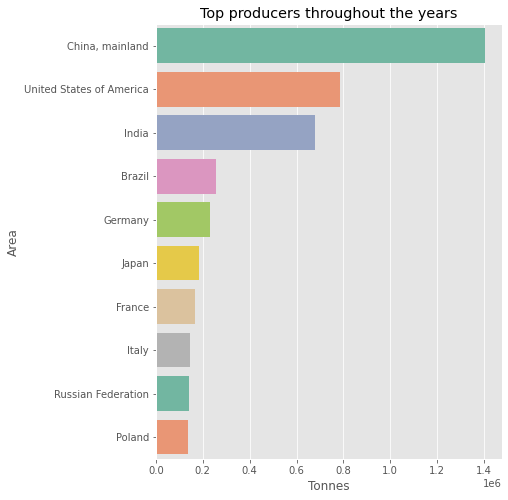

In [90]:
#@title
columns = df.dtypes[df.dtypes == "float64"].index
top_countries=df.groupby(["Area"])[columns].sum()
top=pd.DataFrame(top_countries.agg("mean",axis=1).sort_values(ascending=False),columns=["Tonnes"])[:10]

#Plot the top producers
plt.figure(figsize=(8,8))
plt.gca().set_title("Top producers throughout the years")
sns.barplot(x=top["Tonnes"],y=top.index,data=top, palette="Set2")
plt.gcf().subplots_adjust(left=.3)
plt.show()

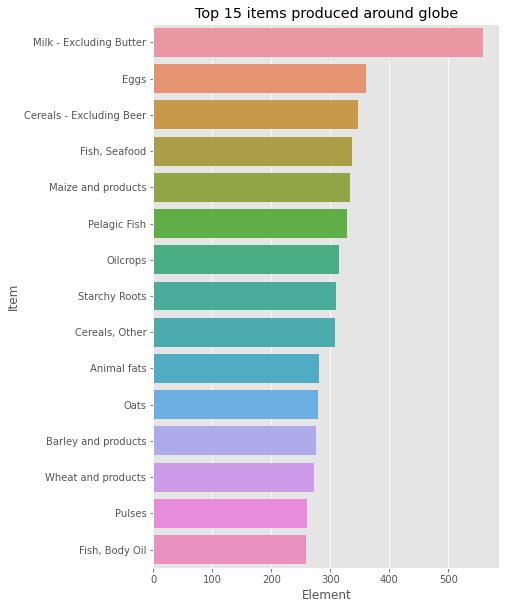

In [91]:
#@title
plt.style.use("ggplot")
items=pd.DataFrame(df.groupby("Item")["Element"].agg("count").sort_values(ascending=False))[:15]
plt.figure(figsize=(8,10))
plt.gcf().subplots_adjust(left=.3)
sns.barplot(x=items.Element,y=items.index,data=items)
plt.gca().set_title("Top 15 items produced around globe")
plt.show()

In [92]:
#@title
foo=df.groupby(["Element"]).agg("sum")
foo=foo.sum(axis=1)
labels=["Feed","Food"]
values=[foo[0],foo[1]]

trace=go.Pie(labels=labels,values=values)
iplot([trace],filename="food_feed",validate=False)

* Food and feed plot for the largest producers(India, USA, China)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



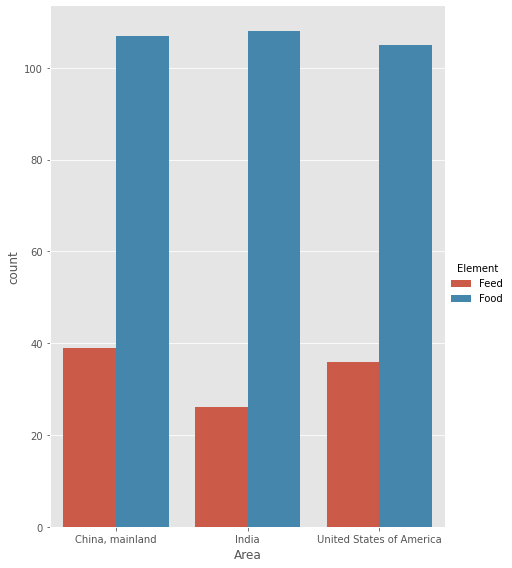

In [93]:
#@title
sns.catplot("Area", data=df[(df['Area'] == "India") | (df['Area'] == "China, mainland") | (df['Area'] == "United States of America")], kind="count", hue="Element", height=8, aspect=.8)

Now, we create a dataframe with countries as index and their annual produce as columns from 1961 to 2013.

In [94]:
area_list = list(df['Area'].unique())
year_list = list(df.iloc[:,10:].columns)

In [95]:
new_df_dict = {}
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area']==ar].sum())
    new_df_dict[ar] = yearly_produce
new_df = pd.DataFrame(new_df_dict)

new_df = pd.DataFrame.transpose(new_df)
new_df.columns = year_list

new_df.head()

,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Afghanistan,11289.0,11508.0,11815.0,10454.0,10433.0,11121.0,11759.0,12017.0,12348.0,13090.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0
Albania,2046.0,2169.0,2230.0,2395.0,2376.0,2478.0,2575.0,2728.0,2822.0,3097.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0
Algeria,7986.0,8839.0,9003.0,9355.0,9891.0,10711.0,11085.0,12418.0,14042.0,14248.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0
Angola,5833.0,5685.0,6219.0,6460.0,6603.0,6499.0,6639.0,6526.0,6211.0,6413.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0
Antigua and Barbuda,64.0,59.0,68.0,77.0,85.0,57.0,58.0,56.0,59.0,55.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0


In [96]:
new_df.shape

(174, 47)

Add mean produce and ranking columns.

In [97]:
mean_produce = []
for i in range(174):
    mean_produce.append(new_df.iloc[i,:].values.mean())
new_df['Mean_Produce'] = mean_produce

new_df['Rank'] = new_df['Mean_Produce'].rank(ascending=False)

new_df.head()

,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
Afghanistan,11289.0,11508.0,11815.0,10454.0,10433.0,11121.0,11759.0,12017.0,12348.0,13090.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13409.808511,69.0
Albania,2046.0,2169.0,2230.0,2395.0,2376.0,2478.0,2575.0,2728.0,2822.0,3097.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4813.021277,105.0
Algeria,7986.0,8839.0,9003.0,9355.0,9891.0,10711.0,11085.0,12418.0,14042.0,14248.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,31632.531915,38.0
Angola,5833.0,5685.0,6219.0,6460.0,6603.0,6499.0,6639.0,6526.0,6211.0,6413.0,...,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0,14354.829787,68.0
Antigua and Barbuda,64.0,59.0,68.0,77.0,85.0,57.0,58.0,56.0,59.0,55.0,...,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0,83.042553,173.0


Now, we create another dataframe with items and their total production each year from 1961 to 2013

In [98]:
item_list = list(df['Item'].unique())

item_df = pd.DataFrame()
item_df['Item_Name'] = item_list

for yr in year_list:
    item_produce = []
    for it in item_list:
        item_produce.append(df[yr][df['Item']==it].sum())
    item_df[yr] = item_produce
item_df.head()

,Item_Name,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Wheat and products,171469.0,179530.0,189658.0,195255.0,201783.0,214205.0,217275.0,217451.0,220283.0,...,527394.0,532263.0,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597.0,587492
1,Rice (Milled Equivalent),158587.0,164614.0,167922.0,181716.0,185657.0,187127.0,191758.0,195967.0,204381.0,...,361107.0,366025.0,372629.0,378698.0,389708.0,394221.0,398559.0,404152.0,406787.0,410880
2,Barley and products,56424.0,60455.0,65501.0,65772.0,70826.0,69288.0,73500.0,72058.0,75226.0,...,102055.0,97185.0,100981.0,93310.0,98209.0,99135.0,92563.0,92570.0,88766.0,99452
3,Maize and products,213050.0,215613.0,221953.0,226232.0,238638.0,251871.0,261893.0,243819.0,264376.0,...,545024.0,549036.0,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730.0,671300
4,Millet and products,22997.0,21785.0,23966.0,27091.0,23820.0,20460.0,25306.0,21259.0,23564.0,...,25789.0,25496.0,25997.0,26750.0,26373.0,24575.0,27039.0,25740.0,26105.0,26346


Similar to countries ranking, rank items as well.

In [99]:
sum_col = []
for i in range(115):
    sum_col.append(item_df.iloc[i,1:].values.sum())
item_df['Sum'] = sum_col
item_df['Production_Rank'] = item_df['Sum'].rank(ascending=False)

item_df.head()

,Item_Name,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Sum,Production_Rank
0,Wheat and products,171469.0,179530.0,189658.0,195255.0,201783.0,214205.0,217275.0,217451.0,220283.0,...,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597.0,587492,18268947.0,6.0
1,Rice (Milled Equivalent),158587.0,164614.0,167922.0,181716.0,185657.0,187127.0,191758.0,195967.0,204381.0,...,372629.0,378698.0,389708.0,394221.0,398559.0,404152.0,406787.0,410880,13627456.0,9.0
2,Barley and products,56424.0,60455.0,65501.0,65772.0,70826.0,69288.0,73500.0,72058.0,75226.0,...,100981.0,93310.0,98209.0,99135.0,92563.0,92570.0,88766.0,99452,4131413.0,20.0
3,Maize and products,213050.0,215613.0,221953.0,226232.0,238638.0,251871.0,261893.0,243819.0,264376.0,...,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730.0,671300,18884759.0,5.0
4,Millet and products,22997.0,21785.0,23966.0,27091.0,23820.0,20460.0,25306.0,21259.0,23564.0,...,25997.0,26750.0,26373.0,24575.0,27039.0,25740.0,26105.0,26346,1107976.0,38.0


In [100]:
item_df.shape

(115, 50)

In [101]:
item_df.Item_Name[item_df.Sum[item_df.Sum == item_df['Sum'].max()].index]

56    Cereals - Excluding Beer
Name: Item_Name, dtype: object

In [102]:
item_df['Item_Name'][item_df['Production_Rank'] < 11.0].sort_values()

56    Cereals - Excluding Beer
65     Fruits - Excluding Wine
3           Maize and products
53     Milk - Excluding Butter
6        Potatoes and products
1     Rice (Milled Equivalent)
57               Starchy Roots
64                  Vegetables
27           Vegetables, Other
0           Wheat and products
Name: Item_Name, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



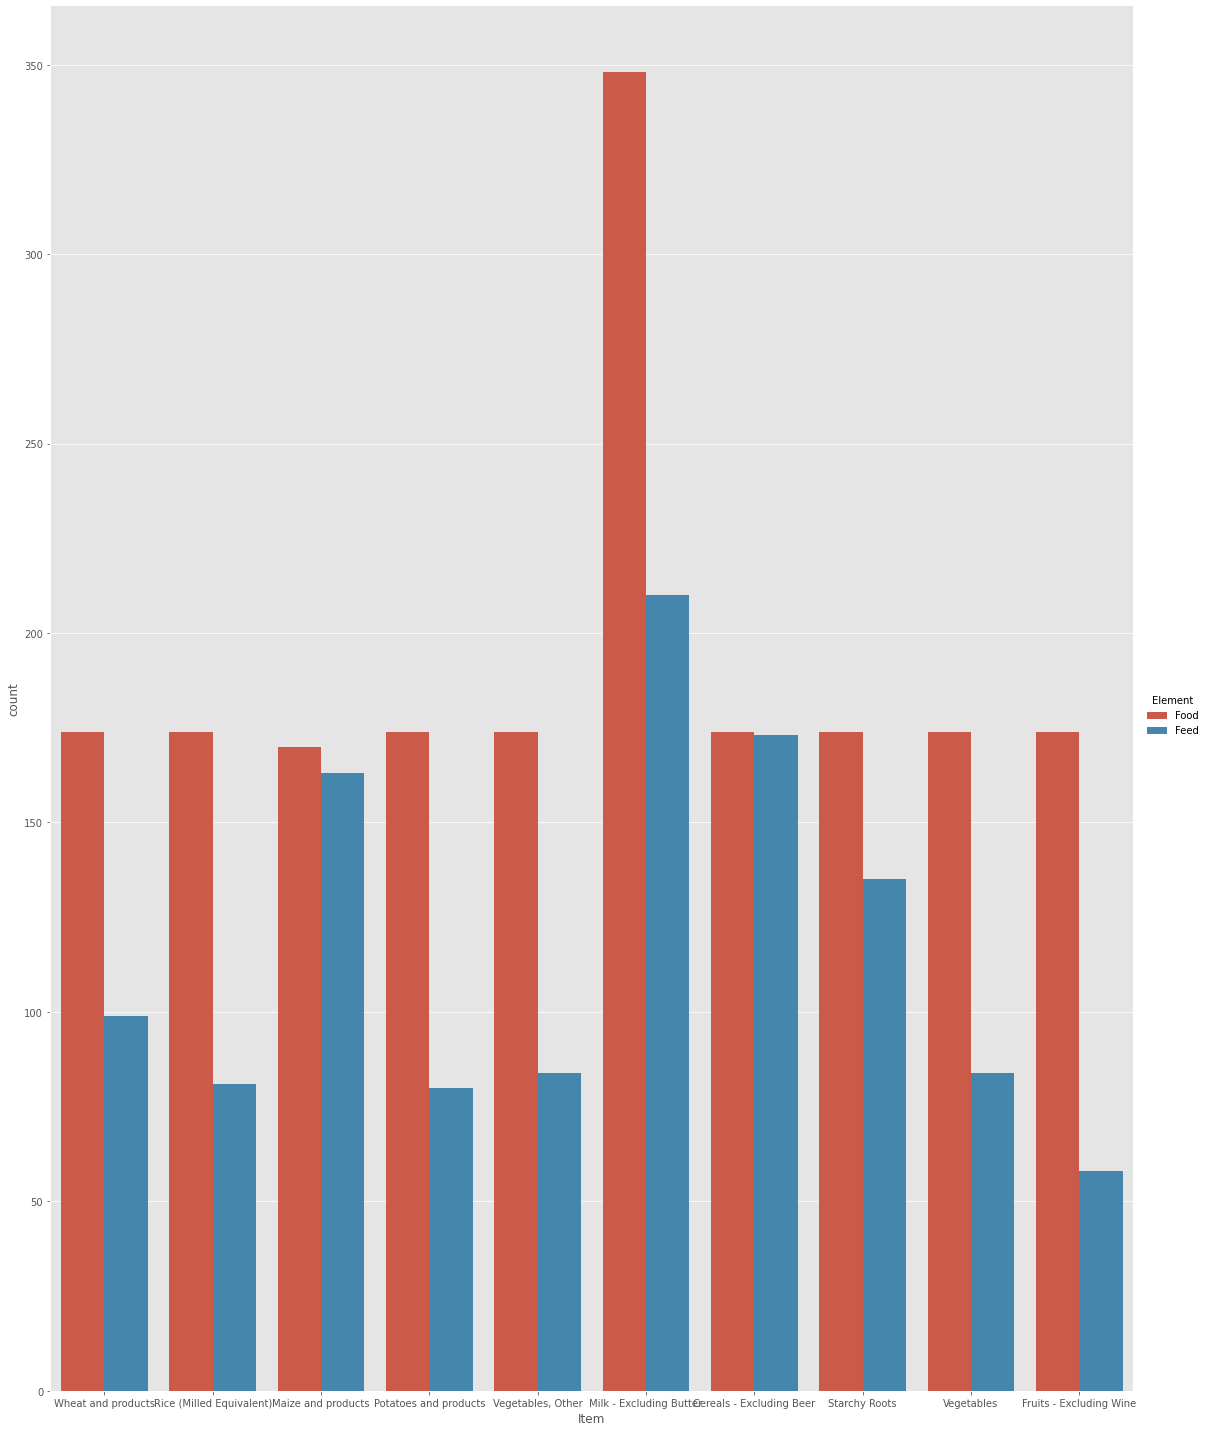

In [103]:
sns.catplot("Item", data=df[(df['Item']=='Wheat and products') | (df['Item']=='Rice (Milled Equivalent)') | (df['Item']=='Maize and products') | (df['Item']=='Potatoes and products') | (df['Item']=='Vegetables, Other') | (df['Item']=='Milk - Excluding Butter') | (df['Item']=='Cereals - Excluding Beer') | (df['Item']=='Starchy Roots') | (df['Item']=='Vegetables') | (df['Item']=='Fruits - Excluding Wine')], kind="count", hue="Element", height=20, aspect=.8)
plt.show()

* Heatmap

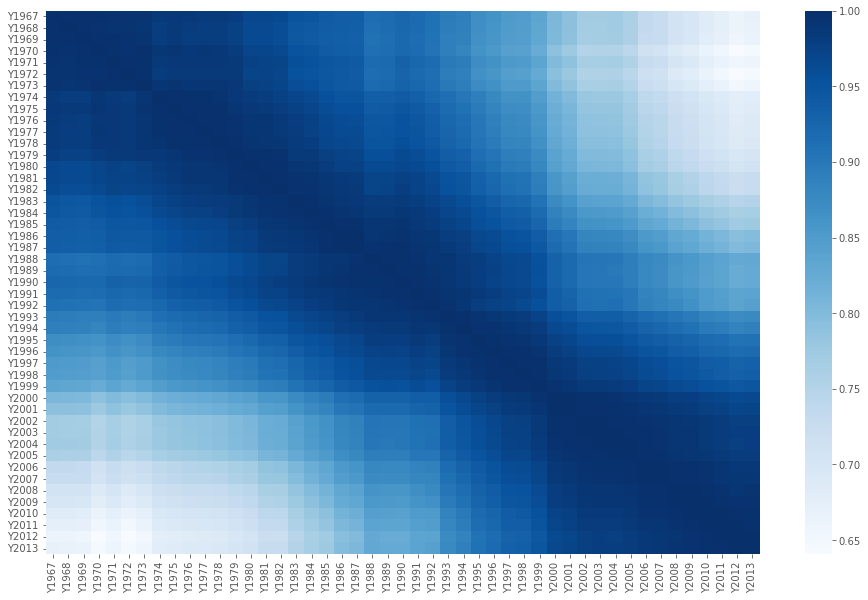

In [104]:
year_df = df.iloc[:,10:]
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(year_df.corr(), ax=ax, cmap='Blues')

# Fractal Clustering

In [129]:
new_df.head()

,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
Afghanistan,11289.0,11508.0,11815.0,10454.0,10433.0,11121.0,11759.0,12017.0,12348.0,13090.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13409.808511,69.0
Albania,2046.0,2169.0,2230.0,2395.0,2376.0,2478.0,2575.0,2728.0,2822.0,3097.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4813.021277,105.0
Algeria,7986.0,8839.0,9003.0,9355.0,9891.0,10711.0,11085.0,12418.0,14042.0,14248.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,31632.531915,38.0
Angola,5833.0,5685.0,6219.0,6460.0,6603.0,6499.0,6639.0,6526.0,6211.0,6413.0,...,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0,14354.829787,68.0
Antigua and Barbuda,64.0,59.0,68.0,77.0,85.0,57.0,58.0,56.0,59.0,55.0,...,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0,83.042553,173.0


In [130]:
df1 = new_df.copy()
df1 = df1.reset_index()
df1.rename(columns={ df1.columns[0]: "Country" }, inplace = True)

In [131]:
df1.head(2)

,Country,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
0,Afghanistan,11289.0,11508.0,11815.0,10454.0,10433.0,11121.0,11759.0,12017.0,12348.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13409.808511,69.0
1,Albania,2046.0,2169.0,2230.0,2395.0,2376.0,2478.0,2575.0,2728.0,2822.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4813.021277,105.0


In [132]:
country_prod = df1[['Country', 'Mean_Produce']]

In [133]:
country_prod.head(5)

,Country,Mean_Produce
0,Afghanistan,13409.808511
1,Albania,4813.021277
2,Algeria,31632.531915
3,Angola,14354.829787
4,Antigua and Barbuda,83.042553


In [134]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [135]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:, 1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

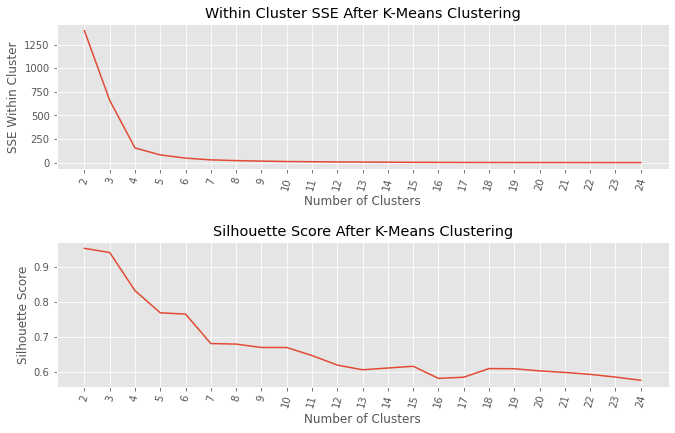

In [136]:
plot_cluster(country_prod, max_loop=25)

In [137]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster))
    
    return df

In [138]:
first_trial = apply_cluster(country_prod, clusters=6)

clustering performance
-----------------------------------
silhouette score: 0.76
sse withing cluster: 47.52615063766194


<ipython-input-137-7050b13d8674>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"Mean_Produce":"mean", "Country":"count"})
    .sort_values('Mean_Produce', ascending=False)
    .reset_index()
)

cluster_perf_df

,cluster,Mean_Produce,Country
0,0,1.555013e+06,1
1,2,7.758241e+05,2
2,5,2.535821e+05,2
3,3,1.438736e+05,12
4,4,6.553431e+04,15
5,1,8.842679e+03,142


In [140]:
first_trial.query("cluster == 1")

,Country,Mean_Produce,cluster
0,Afghanistan,13409.808511,1
1,Albania,4813.021277,1
2,Algeria,31632.531915,1
3,Angola,14354.829787,1
4,Antigua and Barbuda,83.042553,1
...,...,...,...
168,Vanuatu,228.531915,1
169,Venezuela (Bolivarian Republic of),27237.255319,1
171,Yemen,9376.765957,1
172,Zambia,6312.872340,1


In [141]:
# creating a dataframe that only consists of cluster `1`
agg_df3_sub = first_trial.query("cluster == 1").reset_index(drop=True)

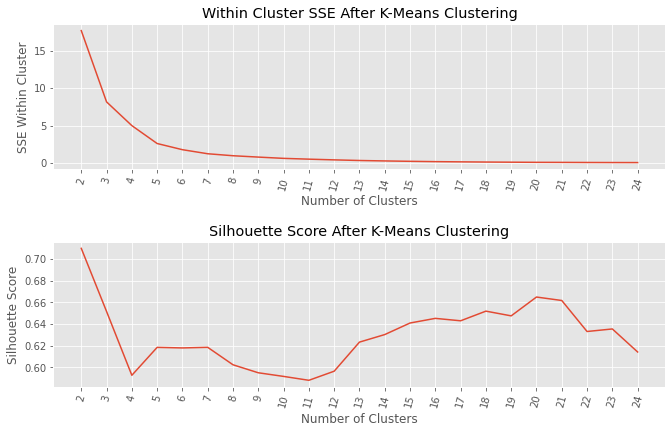

In [142]:
plot_cluster(agg_df3_sub, max_loop=25)

In [148]:
second_trial= apply_cluster(agg_df3_sub, clusters=7)

clustering performance
-----------------------------------
silhouette score: 0.62
sse withing cluster: 1.238625698851847


In [149]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"Mean_Produce":"mean", "Country":"count"})
    .sort_values('Mean_Produce', ascending=False)
    .reset_index()
)

sub_cluster_perf_df

,cluster,Mean_Produce,Country
0,3,32451.297872,8
1,6,25047.562648,9
2,1,20626.285106,10
3,5,14400.045213,16
4,0,8460.403073,18
5,4,4360.341755,32
6,2,860.004776,49


In [150]:
agg_df4_sub = second_trial.query("cluster == 2").reset_index(drop=True)

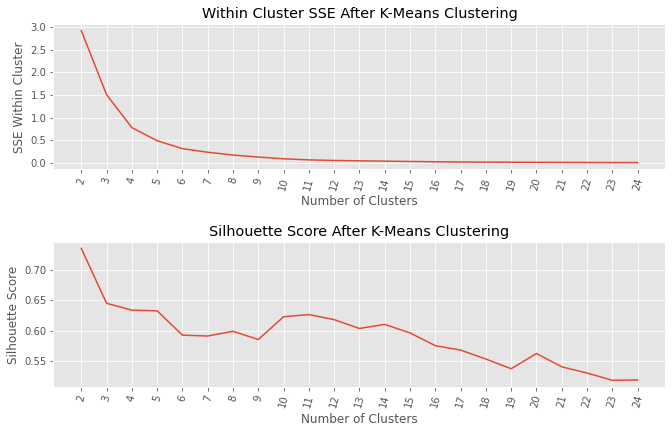

In [152]:
plot_cluster(agg_df4_sub, max_loop=25)

In [153]:
third_trial= apply_cluster(agg_df4_sub, clusters=5)

clustering performance
-----------------------------------
silhouette score: 0.63
sse withing cluster: 0.48680036542562677


In [154]:
sub_cluster_perf_df = (
    third_trial
    .groupby('cluster')
    .agg({"Mean_Produce":"mean", "Country":"count"})
    .sort_values('Mean_Produce', ascending=False)
    .reset_index()
)

sub_cluster_perf_df

,cluster,Mean_Produce,Country
0,4,2295.882979,4
1,1,1851.525836,7
2,3,1349.404255,6
3,0,733.042553,8
4,2,251.468972,24


In [155]:
agg_df5_sub = third_trial.query("cluster == 2").reset_index(drop=True)

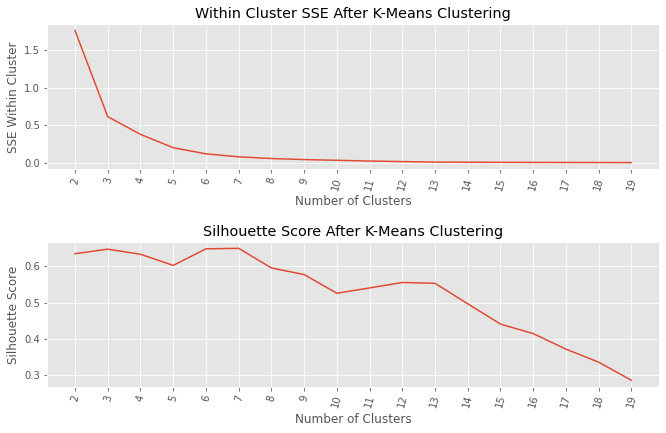

In [157]:
plot_cluster(agg_df5_sub, max_loop=20)

In [159]:
fourth_trial= apply_cluster(agg_df5_sub, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.65
sse withing cluster: 0.6125579257747107


In [161]:
sub_cluster_perf_df = (
    fourth_trial
    .groupby('cluster')
    .agg({"Mean_Produce":"mean", "Country":"count"})
    .sort_values('Mean_Produce', ascending=False)
    .reset_index()
)

sub_cluster_perf_df

,cluster,Mean_Produce,Country
0,0,392.127660,7
1,2,270.250591,9
2,1,107.263298,8


In [162]:
fourth_trial.query("cluster == 1")

,Country,Mean_Produce,cluster
0,Antigua and Barbuda,83.042553,1
4,Bermuda,95.957447,1
9,Dominica,145.531915,1
11,Grenada,124.638298,1
12,Kiribati,88.127660,1
17,Saint Kitts and Nevis,41.106383,1
19,Saint Vincent and the Grenadines,132.957447,1
21,Sao Tome and Principe,146.744681,1


Cluster food items based on produce

In [164]:
item_df.head(5)

,Item_Name,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Sum,Production_Rank
0,Wheat and products,171469.0,179530.0,189658.0,195255.0,201783.0,214205.0,217275.0,217451.0,220283.0,...,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597.0,587492,18268947.0,6.0
1,Rice (Milled Equivalent),158587.0,164614.0,167922.0,181716.0,185657.0,187127.0,191758.0,195967.0,204381.0,...,372629.0,378698.0,389708.0,394221.0,398559.0,404152.0,406787.0,410880,13627456.0,9.0
2,Barley and products,56424.0,60455.0,65501.0,65772.0,70826.0,69288.0,73500.0,72058.0,75226.0,...,100981.0,93310.0,98209.0,99135.0,92563.0,92570.0,88766.0,99452,4131413.0,20.0
3,Maize and products,213050.0,215613.0,221953.0,226232.0,238638.0,251871.0,261893.0,243819.0,264376.0,...,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730.0,671300,18884759.0,5.0
4,Millet and products,22997.0,21785.0,23966.0,27091.0,23820.0,20460.0,25306.0,21259.0,23564.0,...,25997.0,26750.0,26373.0,24575.0,27039.0,25740.0,26105.0,26346,1107976.0,38.0


In [165]:
item_prod = item_df[['Item_Name', 'Sum']]

In [166]:
item_prod.Sum[item_prod['Item_Name'] == 'Cereals - Excluding Beer']

56    61010288.0
Name: Sum, dtype: float64

In [167]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:, 1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

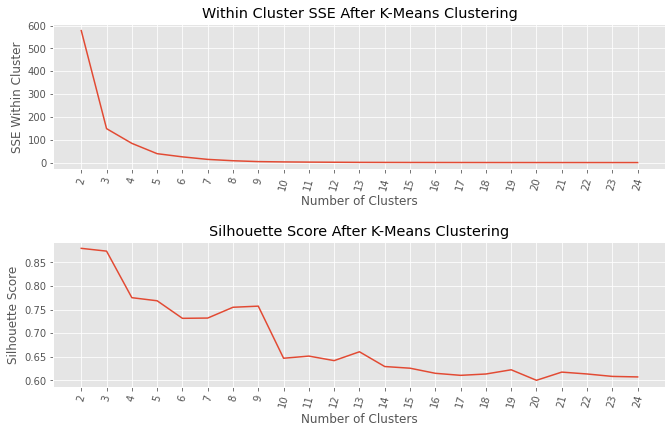

In [168]:
plot_cluster(item_prod, max_loop=25)

In [169]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster))
    
    return df

In [170]:
first_trial = apply_cluster(item_prod, clusters=9)

clustering performance
-----------------------------------
silhouette score: 0.76
sse withing cluster: 4.31496428912228


<ipython-input-169-7050b13d8674>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"Sum":"mean", "Item_Name":"count"})
    .sort_values('Sum', ascending=False)
    .reset_index()
)

cluster_perf_df

,cluster,Sum,Item_Name
0,4,6.101029e+07,1
1,1,4.191903e+07,1
2,8,2.200717e+07,2
3,2,1.844231e+07,3
4,7,1.366266e+07,2
5,5,8.172956e+06,3
6,0,4.852922e+06,8
7,6,2.280080e+06,16
8,3,3.391494e+05,79


In [172]:
first_trial.query("cluster == 3")

,Item_Name,Sum,cluster
4,Millet and products,1107976.0,3
5,"Cereals, Other",678393.0,3
8,Sugar beet,238966.0,3
10,"Sweeteners, Other",555477.0,3
11,Honey,46314.0,3
...,...,...,...
110,Sunflower seed,48416.0,3
111,Cottonseed,275706.0,3
112,Sugar non-centrifugal,471636.0,3
113,Ricebran Oil,21395.0,3


In [173]:
# creating a dataframe that only consists of cluster `0`
agg_df3_sub = first_trial.query("cluster == 3").reset_index(drop=True)

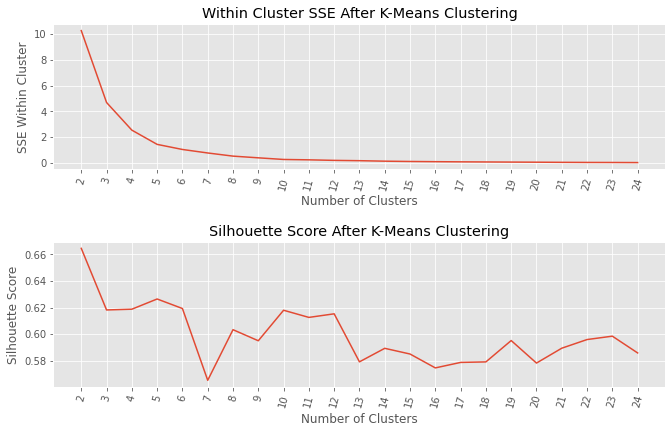

In [174]:
plot_cluster(agg_df3_sub, max_loop=25)

# GMM

In [175]:
country_prod.head(5)

,Country,Mean_Produce,cluster
0,Afghanistan,13409.808511,1
1,Albania,4813.021277,1
2,Algeria,31632.531915,1
3,Angola,14354.829787,1
4,Antigua and Barbuda,83.042553,1


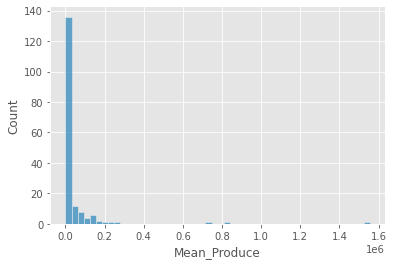

In [176]:
sns.histplot(country_prod['Mean_Produce'], bins=50)

<ipython-input-177-188106eba218>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



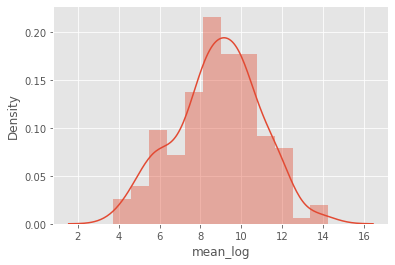

In [177]:
country_prod['mean_log'] = np.log1p(country_prod['Mean_Produce'])
sns.distplot(country_prod['mean_log'])

In [178]:
country_prod

,Country,Mean_Produce,cluster,mean_log
0,Afghanistan,13409.808511,1,9.503816
1,Albania,4813.021277,1,8.479288
2,Algeria,31632.531915,1,10.361973
3,Angola,14354.829787,1,9.571911
4,Antigua and Barbuda,83.042553,1,4.431323
...,...,...,...,...
169,Venezuela (Bolivarian Republic of),27237.255319,1,10.212378
170,Viet Nam,61967.234043,4,11.034377
171,Yemen,9376.765957,1,9.146097
172,Zambia,6312.872340,1,8.750504


In [179]:
country_prod.drop(['cluster'], axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [180]:
country_prod

,Country,Mean_Produce,mean_log
0,Afghanistan,13409.808511,9.503816
1,Albania,4813.021277,8.479288
2,Algeria,31632.531915,10.361973
3,Angola,14354.829787,9.571911
4,Antigua and Barbuda,83.042553,4.431323
...,...,...,...
169,Venezuela (Bolivarian Republic of),27237.255319,10.212378
170,Viet Nam,61967.234043,11.034377
171,Yemen,9376.765957,9.146097
172,Zambia,6312.872340,8.750504


In [184]:
df1 = country_prod.copy()

In [185]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Country'] = le.fit_transform(df1.Country.values)

In [186]:
df1.head()

,Country,Mean_Produce,mean_log
0,0,13409.808511,9.503816
1,1,4813.021277,8.479288
2,2,31632.531915,10.361973
3,3,14354.829787,9.571911
4,4,83.042553,4.431323


In [189]:
df2 = df1.drop(['Mean_Produce'], axis = 1)

In [190]:
df2

,Country,mean_log
0,0,9.503816
1,1,8.479288
2,2,10.361973
3,3,9.571911
4,4,4.431323
...,...,...
169,169,10.212378
170,170,11.034377
171,171,9.146097
172,172,8.750504


In [195]:
def apply_kmeans(df, n):
  X = df.iloc[:,:]
  print(X)
  kmeans = KMeans(n_clusters=n)
  kmeans.fit(X)
  pred = kmeans.predict(X)
  frame = pd.DataFrame(X)
  frame['cluster'] = pred
  frame.columns = ['Country', 'Mean', 'cluster']

#plotting results
  color=['blue','green','cyan', 'black']
  for k in range(0,n):
    data = frame[frame["cluster"]==k]
    plt.scatter(data['Country'], data["Mean"], c=color[k])
  plt.show()

     Country   mean_log  cluster
0          0   9.503816        1
1          1   8.479288        1
2          2  10.361973        1
3          3   9.571911        1
4          4   4.431323        1
..       ...        ...      ...
169      169  10.212378        2
170      170  11.034377        2
171      171   9.146097        2
172      172   8.750504        2
173      173   8.854361        2

[174 rows x 3 columns]


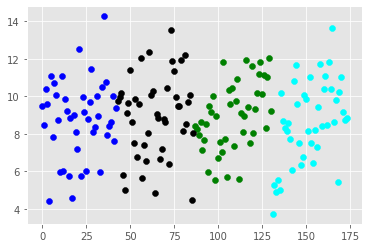

In [196]:
apply_kmeans(df2, 4)

In [199]:
def apply_gmm(df, n):
  X = df.copy()
  gmm = GaussianMixture(n_components=4)
  gmm.fit(X)
  #predictions from gmm
  labels = gmm.predict(X)
  frame = pd.DataFrame(X)
  frame['cluster'] = labels
  frame.columns = ['Country', 'Mean', 'cluster']

#plotting results
  color=['blue','green','cyan', 'black']
  for k in range(0,n):
    data = frame[frame["cluster"]==k]
    plt.scatter(data['Country'], data["Mean"], c=color[k])
  plt.show()

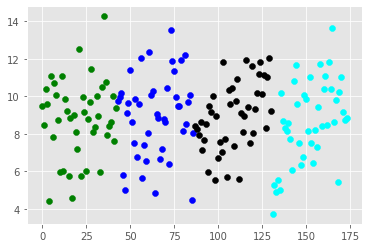

In [202]:
from sklearn.mixture import GaussianMixture

apply_gmm(df2, 4)
